# Exercise 5: Comparison to deep models

### Description

Instead of choosing one hidden layer (with many neurons) you experiment here with multiple hidden layers (each with not so many neurons).

1. Fit models with 2, 3 and 4 hidden layers with approximately the same number of parameters as a network with one hidden layer of 100 neurons. Hint: Calculate the number of parameters in a network with input dimensionality N_in, K hidden layers with N_h units, one output layer with N_out dimensions and solve for N_h. Confirm you result with the keras method model.summary().
2. Run each model multiple times with different initial conditions and plot summary statistics of the best validation loss and accuracy versus the number of hidden layers.

### Solution

model with 100 hidden neurons in 1 hidden layer ==> **26205 params**

### 1. Fit models with 2, 3 and 4 hidden layers with approximately the same number of parameters as a network with one hidden layer of 100 neurons.

    a. Model with 1 hidden layer of 100 neurons

In [64]:
callback = [keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=20, verbose=1, mode='auto')]

In [53]:
model_1l = Sequential([Dense(units=100, input_dim=256, activation= 'relu'),
                    Dense(5,activation= 'softmax')])
model_1l.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])
hist_1l = model_1l.fit(x_train, y_train, validation_data= (x_test, y_test),batch_size=128, epochs=100, callbacks= callback_1l, verbose=0)
acc_1l = model_1l.evaluate(x_test, y_test, verbose=1)
model_1l.summary()

Epoch 00081: early stopping
14629/14629 [==============================] - 1s 53us/step
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_108 (Dense)            (None, 100)               25700     
_________________________________________________________________
dense_109 (Dense)            (None, 5)                 505       
Total params: 26,205
Trainable params: 26,205
Non-trainable params: 0
_________________________________________________________________


In [62]:
print('Accuracy = {}%'.format(round(acc_1l[1], 4)*100))

Accuracy = 87.96000000000001%


    b. Model with 2 hidden layers of 77 neurons each

In [68]:
model_2l = Sequential([Dense(units=77, input_dim=256, activation= 'relu'), 
                       Dense(77,activation= 'relu'), 
                       Dense(5,activation= 'softmax')])
model_2l.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])
model_2l.fit(x_train, y_train, validation_data= (x_test, y_test),batch_size=128, epochs=100, callbacks= callback, verbose=0)
acc_2l = model_2l.evaluate(x_test, y_test, verbose=0)
print('Accuracy = {}%'.format(round(acc_2l[1], 4)*100))
model_2l.summary()

Epoch 00064: early stopping
Accuracy = 87.14%
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_120 (Dense)            (None, 77)                19789     
_________________________________________________________________
dense_121 (Dense)            (None, 77)                6006      
_________________________________________________________________
dense_122 (Dense)            (None, 5)                 390       
Total params: 26,185
Trainable params: 26,185
Non-trainable params: 0
_________________________________________________________________


        c. Model with 3 hidden layers of 66 neurons each

In [71]:
model_3l = Sequential([Dense(units=66, input_dim=256, activation= 'relu'), 
                       Dense(66,activation= 'relu'), Dense(66,activation= 'relu'), 
                       Dense(5,activation= 'softmax')])
model_3l.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])
model_3l.fit(x_train, y_train, validation_data= (x_test, y_test),batch_size=128, epochs=100, callbacks= callback, verbose=0)
acc_3l = model_3l.evaluate(x_test, y_test, verbose=0)
print('Accuracy = {}%'.format(round(acc_3l[1], 4)*100))
model_3l.summary()

Epoch 00050: early stopping
Accuracy = 86.9%
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_132 (Dense)            (None, 66)                16962     
_________________________________________________________________
dense_133 (Dense)            (None, 66)                4422      
_________________________________________________________________
dense_134 (Dense)            (None, 66)                4422      
_________________________________________________________________
dense_135 (Dense)            (None, 5)                 335       
Total params: 26,141
Trainable params: 26,141
Non-trainable params: 0
_________________________________________________________________


        d. Model with 4 hidden layers of 59 neurons each

In [72]:
model_4l = Sequential([Dense(units=59, input_dim=256, activation= 'relu'), 
                       Dense(59,activation= 'relu'), 
                       Dense(59,activation= 'relu'), 
                       Dense(59,activation= 'relu'),
                       Dense(5,activation= 'softmax')])
model_4l.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])
model_4l.fit(x_train, y_train, validation_data= (x_test, y_test),batch_size=128, epochs=100, callbacks= callback, verbose=0)
acc_4l = model_3l.evaluate(x_test, y_test, verbose=0)
print('Accuracy = {}%'.format(round(acc_4l[1], 4)*100))
model_4l.summary()

Epoch 00051: early stopping
Accuracy = 86.9%
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_136 (Dense)            (None, 59)                15163     
_________________________________________________________________
dense_137 (Dense)            (None, 59)                3540      
_________________________________________________________________
dense_138 (Dense)            (None, 59)                3540      
_________________________________________________________________
dense_139 (Dense)            (None, 59)                3540      
_________________________________________________________________
dense_140 (Dense)            (None, 5)                 300       
Total params: 26,083
Trainable params: 26,083
Non-trainable params: 0
_________________________________________________________________


### 2. Run each model multiple times with different initial conditions and plot summary statistics of the best validation loss and accuracy versus the number of hidden layers.

In [77]:
callback = [keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=20, verbose=0, mode='auto')]

hists_2l = []
hists_3l = []
hists_4l = []

accs_2l = []
accs_3l = []
accs_4l = []

for i in range(20):
    m2 = Sequential([Dense(units=77, input_dim=256, activation= 'relu'), 
                       Dense(77,activation= 'relu'), 
                       Dense(5,activation= 'softmax')])
    
    m3 = Sequential([Dense(units=66, input_dim=256, activation= 'relu'), 
                       Dense(66,activation= 'relu'), Dense(66,activation= 'relu'), 
                       Dense(5,activation= 'softmax')])
    
    m4 = Sequential([Dense(units=59, input_dim=256, activation= 'relu'), 
                       Dense(59,activation= 'relu'), 
                       Dense(59,activation= 'relu'), 
                       Dense(59,activation= 'relu'),
                       Dense(5,activation= 'softmax')])
    
    for m in [m2, m3, m4]:
        m.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])
        
    hists_2l.append(m2.fit(x_train, y_train, validation_data= (x_test, y_test),batch_size=128, epochs=100, callbacks= callback, verbose=0))
    hists_3l.append(m3.fit(x_train, y_train, validation_data= (x_test, y_test),batch_size=128, epochs=100, callbacks= callback, verbose=0))
    hists_4l.append(m4.fit(x_train, y_train, validation_data= (x_test, y_test),batch_size=128, epochs=100, callbacks= callback, verbose=0))
    
    accs_2l.append(m2.evaluate(x_test, y_test, verbose=0))
    accs_3l.append(m3.evaluate(x_test, y_test, verbose=0))
    accs_4l.append(m4.evaluate(x_test, y_test, verbose=0))

In [146]:
max_2l = max([a[1] for a in accs_2l])
max_3l = max([a[1] for a in accs_3l])
max_4l = max([a[1] for a in accs_4l])

max_accs = [max_2l, max_3l, max_4l]

for i in range(3):
    print('Best accuracy for model of {} layers = {}'.format(i+2, max_accs[i]))

Best accuracy for model of 2 layers = 0.880716385266225
Best accuracy for model of 3 layers = 0.8790758083300023
Best accuracy for model of 4 layers = 0.8768200150467708


In [125]:
accs = [accs_2l, accs_3l, accs_4l]

val_accs = []
val_loss = []

for a in accs:
    val_accs.append([x[1] for x in a])
    val_loss.append([x[0] for x in a])

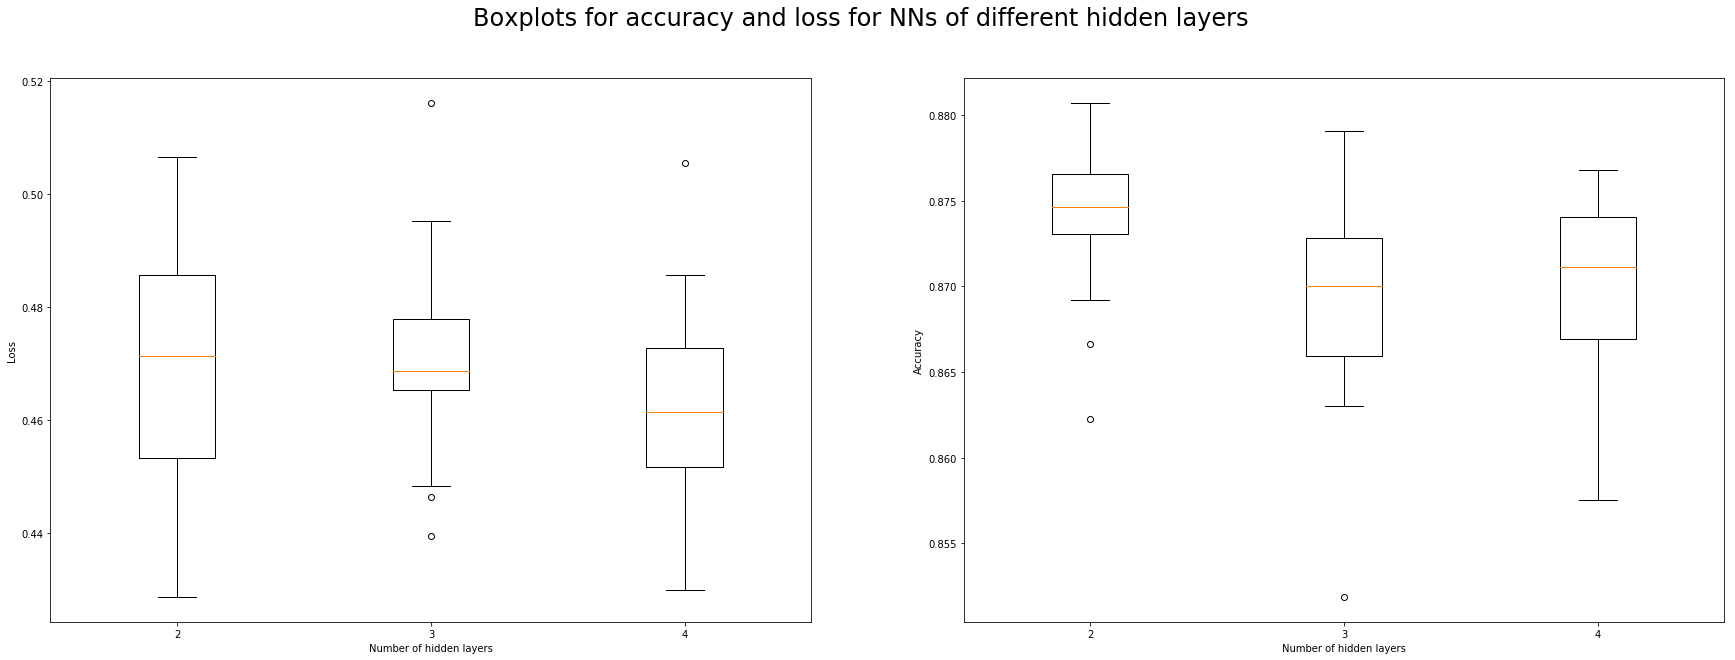

In [135]:
xlabel = ['2', '3', '4']
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(30,10))
    #plt.subplot(1,1)
ax1.boxplot(val_loss)
ax1.set_xticklabels(xlabel)
ax1.set_xlabel("Number of hidden layers")
ax1.set_ylabel("Loss")
    #fig1, ax2 = plt.subplots()
ax2.boxplot(val_accs)
ax2.set_xticklabels(xlabel)
ax2.set_xlabel("Number of hidden layers")
ax2.set_ylabel("Accuracy")
fig.suptitle("Boxplots for accuracy and loss for NNs of different hidden layers", fontsize=24)
plt.show()